In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
pd.set_option('display.precision', 2)

In [17]:
from lumen_irmas.utils import load_raw_file, get_wav_files, get_file_info

### Training Data

In [18]:
files = get_wav_files("../data/raw/IRMAS_Training_Data/")
len(files)

6705

In [19]:
sample = files[0]
sample_info = get_file_info(sample, extract_music_features=True)

In [20]:
for k,v in sample_info.items():
    print(f"{k}: {v}")

path: ../data/raw/IRMAS_Training_Data/sax/122__[sax][nod][cla]1670__3.wav
pitch: 5.180769679220701
bpm: 77.1338619402985
onset: 0.034829931972789115
sample_rate: 44100
duration: 2.9999773242630385
channels: 2


In [49]:
metadata = pd.read_csv("../data/metadata_train.csv")
metadata.head()

,path,pitch,bpm,onset,sample_rate,duration,channels,fname,song_name,inst,label_count
0,../data/raw/IRMAS_Training_Data//tru/[tru][cla...,6.43,60.09,0.03,44100,3.0,2,[tru][cla]1954__1,[tru][cla]1954,tru,1
1,../data/raw/IRMAS_Training_Data//tru/[tru][jaz...,6.44,191.41,0.03,44100,3.0,2,[tru][jaz_blu]1884__1,[tru][jaz_blu]1884,tru,1
2,../data/raw/IRMAS_Training_Data//tru/[tru][pop...,4.26,147.66,0.03,44100,3.0,2,[tru][pop_roc]2040__2,[tru][pop_roc]2040,tru,1
3,../data/raw/IRMAS_Training_Data//tru/[tru][cla...,6.17,105.47,0.03,44100,3.0,2,[tru][cla]2014__2,[tru][cla]2014,tru,1
4,../data/raw/IRMAS_Training_Data//tru/[tru][pop...,4.57,77.13,0.03,44100,3.0,2,[tru][pop_roc]2066__1,[tru][pop_roc]2066,tru,1


In [56]:
metadata.describe()

,pitch,bpm,onset,sample_rate,duration,channels,label_count
count,6651.00,6691.00,6705.00,6705.0,6.70e+03,6705.0,6705.0
mean,4.94,125.03,0.06,44100.0,3.00e+00,2.0,1.0
std,0.65,35.88,0.09,0.0,4.44e-16,0.0,0.0
min,4.18,24.15,0.03,44100.0,3.00e+00,2.0,1.0
25%,4.46,99.38,0.03,44100.0,3.00e+00,2.0,1.0
50%,4.70,120.19,0.03,44100.0,3.00e+00,2.0,1.0
75%,5.30,143.55,0.06,44100.0,3.00e+00,2.0,1.0
max,7.56,304.00,2.37,44100.0,3.00e+00,2.0,1.0


In [27]:
metadata.describe(include=["O"])

,path,fname,song_name,inst
count,6705,6705,6705,6705
unique,6705,6705,2273,11
top,../data/raw/IRMAS_Training_Data//tru/[tru][cla...,[tru][cla]1954__1,[tru][cla]1954,voi
freq,1,1,3,778


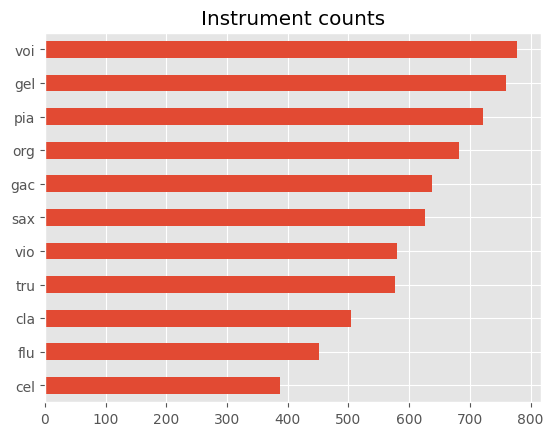

In [54]:
metadata["inst"].value_counts().sort_values(ascending=True).plot(kind="barh")
plt.title("Instrument counts");

### Validation data